<a href="https://colab.research.google.com/github/Hari0077/FYP_TNTD/blob/main/trclassifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.0.0
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import cv2

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.0.0`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_data_dir = "/content/drive/MyDrive/trclassifications/train"
validation_data_dir = "/content/drive/MyDrive/trclassifications/validation"

In [ ]:
cv2.imread("/content/drive/MyDrive/trclassifications/train/tr1/104_1.jpg")

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 5,  5,  5],
        [ 0,  0,  0],
        [ 2,  2,  2]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 3,  3,  3],
        [16, 16, 16],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 5,  5,  5],
        [ 0,  0,  0]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

In [ ]:
from tensorflow.keras.preprocessing import image
import cv2

In [ ]:
img_width=200
img_height=200
batch_size=3

In [ ]:
datagen=ImageDataGenerator(rescale=1.0/255)

In [ ]:
train_data_gen=datagen.flow_from_directory(train_data_dir,
                                           target_size=(img_width,img_height),
                                           classes=['tr1','tr2','tr3','tr4','tr5'],
                                           class_mode='categorical'
                                           )
validation_data_gen=datagen.flow_from_directory(validation_data_dir,
                                           target_size=(img_width,img_height),
                                           classes=['tr1','tr2','tr3','tr4','tr5'],
                                           class_mode='categorical')


Found 274 images belonging to 5 classes.
Found 106 images belonging to 5 classes.


In [ ]:
train_data_gen.class_indices

{'tr1': 0, 'tr2': 1, 'tr3': 2, 'tr4': 3, 'tr5': 4}

In [ ]:
validation_data_gen.class_indices

{'tr1': 0, 'tr2': 1, 'tr3': 2, 'tr4': 3, 'tr5': 4}

In [ ]:
validation_data_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

In [ ]:
model = tf.keras.models.Sequential(
    [
      tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape =(200,200,3)),
      tf.keras.layers.MaxPool2D(2,2),
      #
      tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
      tf.keras.layers.MaxPool2D(2,2),
      #
      tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
      tf.keras.layers.MaxPool2D(2,2),
     ##
      tf.keras.layers.Flatten(),
     ##
     tf.keras.layers.Dense(512,activation='relu'),
      ##
     tf.keras.layers.Dense(5,activation='softmax')
    ]
)

In [ ]:
from tensorflow.keras.optimizers import RMSprop,Adam

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(learning_rate=0.001),
              metrics = ['accuracy'])

In [ ]:
model_fit = model.fit(train_data_gen,
                      steps_per_epoch=7,
                      epochs = 12,
                      validation_data = validation_data_gen)

Epoch 1/12
7/7 [==============================] - 13s 2s/step - loss: 7.2102 - accuracy: 0.4190 - val_loss: 1.5091 - val_accuracy: 0.4434
Epoch 2/12
7/7 [==============================] - 11s 1s/step - loss: 1.3223 - accuracy: 0.5143 - val_loss: 1.5416 - val_accuracy: 0.4906
Epoch 3/12
7/7 [==============================] - 11s 2s/step - loss: 1.2340 - accuracy: 0.5333 - val_loss: 1.2202 - val_accuracy: 0.5094
Epoch 4/12
7/7 [==============================] - 11s 2s/step - loss: 1.1705 - accuracy: 0.5524 - val_loss: 1.2880 - val_accuracy: 0.5000
Epoch 5/12
7/7 [==============================] - 11s 2s/step - loss: 0.9816 - accuracy: 0.6518 - val_loss: 1.3049 - val_accuracy: 0.5377
Epoch 6/12
7/7 [==============================] - 11s 2s/step - loss: 1.1470 - accuracy: 0.5667 - val_loss: 0.9807 - val_accuracy: 0.6132
Epoch 7/12
7/7 [==============================] - 11s 2s/step - loss: 0.8986 - accuracy: 0.6810 - val_loss: 0.8377 - val_accuracy: 0.6604
Epoch 8/12
7/7 [==================

In [ ]:
model_fit.history['val_accuracy']

[0.4433962404727936,
 0.49056604504585266,
 0.5094339847564697,
 0.5,
 0.5377358198165894,
 0.6132075190544128,
 0.6603773832321167,
 0.8113207817077637,
 0.8113207817077637,
 0.33018869161605835,
 0.7358490824699402,
 0.8679245114326477]

In [ ]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 99, 99, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 48, 48, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 23, 23, 64)      

In [ ]:
import tensorflow as tf
from keras.models import load_model
model.save('modelt1.h5')

In [ ]:
import os

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.0.0`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
2_1.jpg


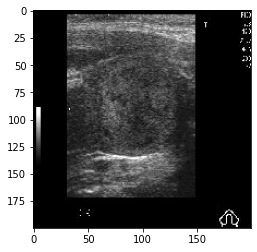

[[0. 1. 0. 0. 0.]]
The tirad type is  [1]
[[0. 1. 0. 0. 0.]]
tr2
25_1.jpg


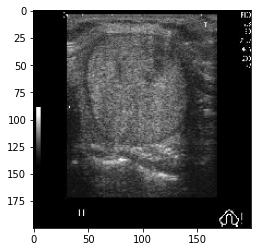

[[0.         0.         0.0198428  0.98015726 0.        ]]
The tirad type is  [3]
[[0.         0.         0.0198428  0.98015726 0.        ]]
tr4
7_1.jpg


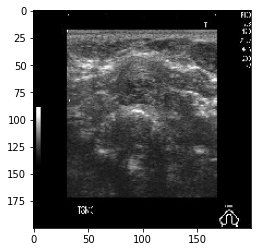

[[0. 0. 0. 1. 0.]]
The tirad type is  [3]
[[0. 0. 0. 1. 0.]]
tr4
19_1 (copy).jpg


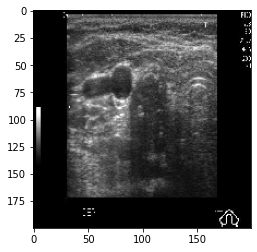

[[0. 0. 0. 0. 1.]]
The tirad type is  [4]
[[0. 0. 0. 0. 1.]]
tr5


In [ ]:
%tensorflow_version 2.0.0
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image
import os
from keras.preprocessing.image import load_img
from keras.models import load_model
import cv2
import numpy as np
from matplotlib import pyplot as plt

model = load_model("/content/modelt1.h5")


dir_path = '/content/drive/MyDrive/trclassifications/test'

for i in os.listdir(dir_path):
    print(i)
    img = image.load_img(dir_path+'/'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()

    X = image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images = np.vstack([X])
    #print(images)
    val = model.predict(images)
    predcls = np.argmax(val, axis=1)
    print(val)
    print('The tirad type is ',predcls)
    print(val)
    if predcls == 0:
      print("tr1")
    if predcls == 1:
      print("tr2")
    if predcls == 2:
      print("tr3")
    if predcls == 3:
      print("tr4")
    if predcls == 4:
      print("tr5")